In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
data= pd.read_csv('/content/social_network.csv')
data.head()

,user_id,account_creation_date,account_status,login_activity,posting_activity,social_connections,suspicious_activity
0,1,2021-01-01 00:00:00.000000000,active,49,30,40,0
1,2,2021-01-02 13:14:38.929765886,inactive,4,43,278,1
2,3,2021-01-04 02:29:17.859531772,active,24,43,704,1
3,4,2021-01-05 15:43:56.789297658,active,92,16,394,1
4,5,2021-01-07 04:58:35.719063545,active,56,4,361,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                300 non-null    int64 
 1   account_creation_date  300 non-null    object
 2   account_status         300 non-null    object
 3   login_activity         300 non-null    int64 
 4   posting_activity       300 non-null    int64 
 5   social_connections     300 non-null    int64 
 6   suspicious_activity    300 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 16.5+ KB


In [7]:
data.isnull().sum() #no null values found

user_id                  0
account_creation_date    0
account_status           0
login_activity           0
posting_activity         0
social_connections       0
suspicious_activity      0
dtype: int64

In [8]:
var_socialnetwork_df=data

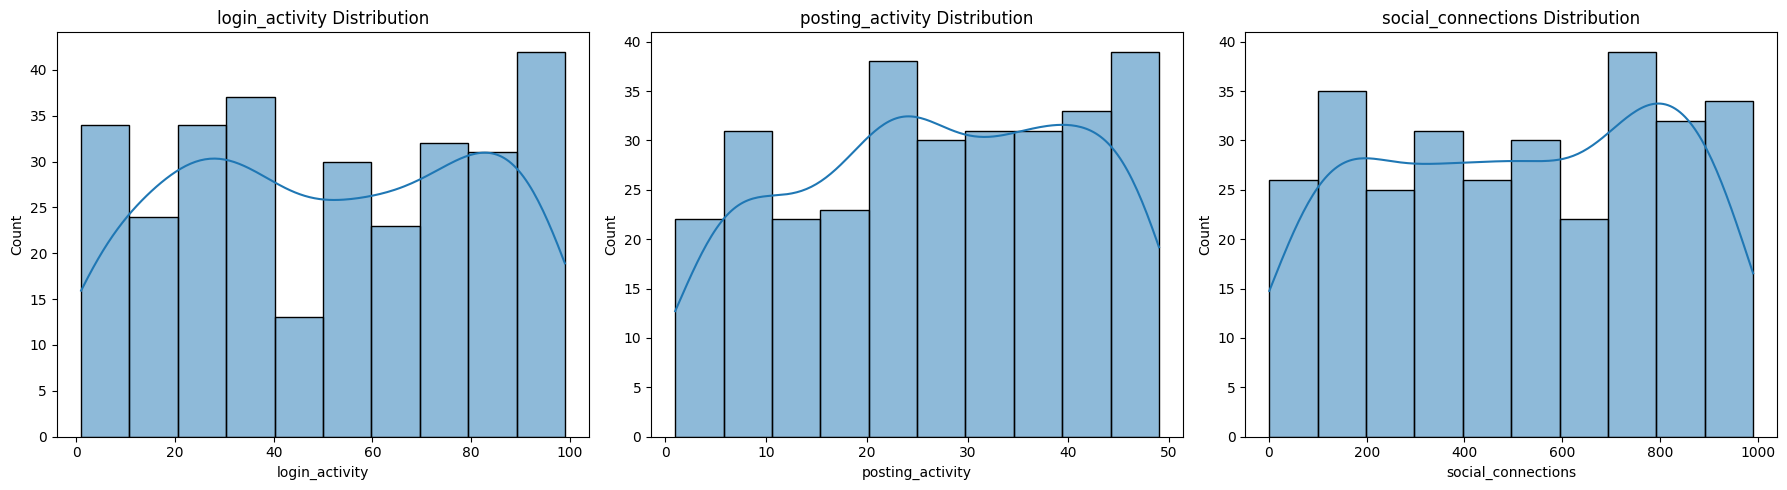

In [9]:
plt.figure(figsize=(18, 5))
features = ['login_activity', 'posting_activity', 'social_connections']
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=var_socialnetwork_df, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [10]:
X = var_socialnetwork_df[features]

model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
predictions = model.fit_predict(X)

In [11]:
var_socialnetwork_df['anomaly_score'] = model.decision_function(X)
var_socialnetwork_df['is_anomaly'] = predictions
var_socialnetwork_df['is_anomaly'] = var_socialnetwork_df['is_anomaly'].apply(lambda x: 1 if x == -1 else 0)


In [12]:
print(var_socialnetwork_df.head())
print(var_socialnetwork_df['is_anomaly'].value_counts())


   user_id          account_creation_date account_status  login_activity  \
0        1  2021-01-01 00:00:00.000000000         active              49   
1        2  2021-01-02 13:14:38.929765886       inactive               4   
2        3  2021-01-04 02:29:17.859531772         active              24   
3        4  2021-01-05 15:43:56.789297658         active              92   
4        5  2021-01-07 04:58:35.719063545         active              56   

   posting_activity  social_connections  suspicious_activity  anomaly_score  \
0                30                  40                    0      -0.003959   
1                43                 278                    1      -0.060944   
2                43                 704                    1      -0.001322   
3                16                 394                    1       0.000179   
4                 4                 361                    0      -0.016773   

   is_anomaly  
0           1  
1           1  
2           1  
3   

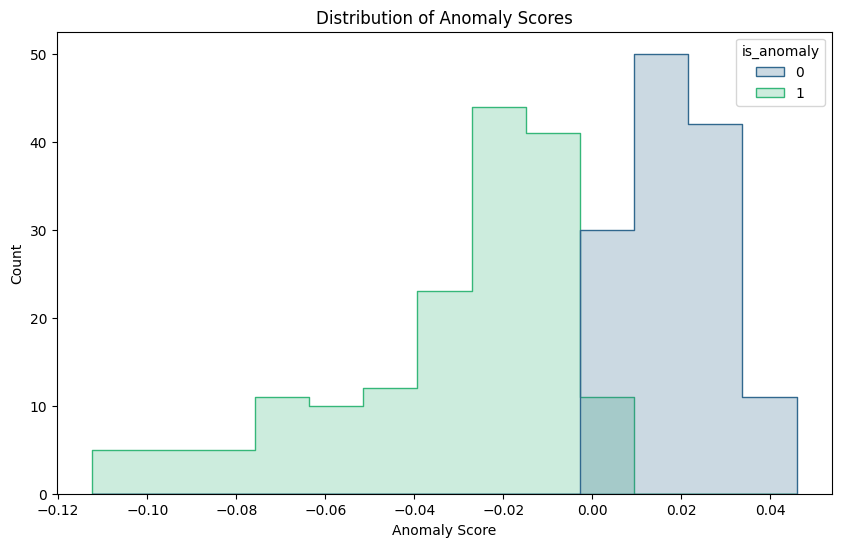

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=var_socialnetwork_df, x='anomaly_score', hue='is_anomaly', element='step', palette='viridis')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

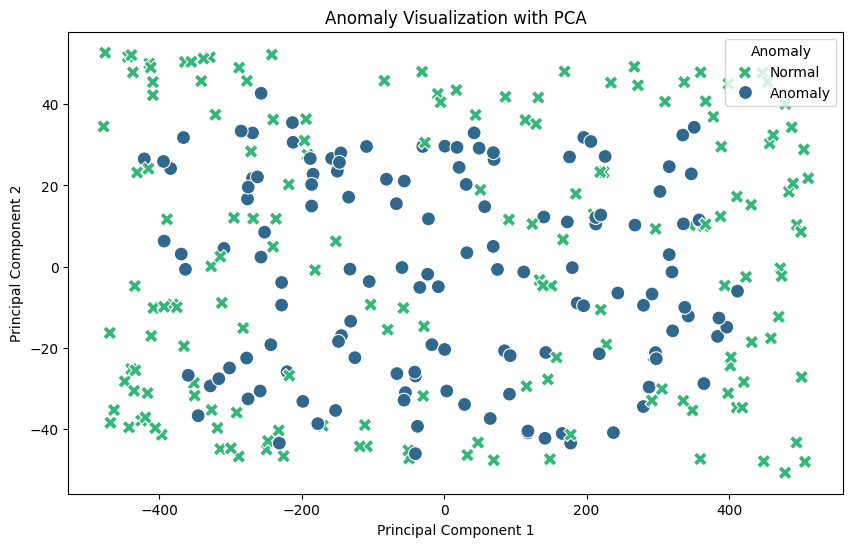

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=var_socialnetwork_df['is_anomaly'], palette='viridis', style=var_socialnetwork_df['is_anomaly'], s=100)
plt.title('Anomaly Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

In [17]:
# PCA is not usefull but histogaram plot clearly shows anamolies

In [18]:
# The Isolation Forest model identifies anomalies based on deviations from typical patterns in login activity,
# posting activity, and social connections.
# Anomalies are considered to be users whose behavior significantly diverges from the norm, potentially indicating fraudulent activity.